<a href="https://colab.research.google.com/github/rafpank/Colab/blob/main/data_science_bootcamp%20/uczenie_maszynowe/04_regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```

### Spis treści:
1. [Regresja liniowa - wprowadzenie](#a1)
2. [Wygenerowanie danych](#a2)
3. [Podział danych na zbiór treningowy i testowy](#a3)
4. [Wizualizacja](#a4)
5. [Regresja liniowa](#a5)
6. [Wizualizacja zbioru treningowego i dopasowanego modelu](#a6)
7. [Wizualizacja zbioru testowego i dopasowanego modelu](#a7)
8. [Ocena modelu](#a8)
9. [Przykład złego zastosowania regresji liniowej](#a9)

In [1]:
import sklearn
sklearn.__version__

'1.5.2'

In [3]:
import numpy as np

### <a name='a1'></a> Regresja Liniowa - wprowadzenie

Zdefiniujmy:
- $X_1, X_2, ..., X_n$ - zmienne niezależne (nasze dane do modelu)
- $Y$ - zmienna docelowa
- $y_{true}$ - wartość rzeczywista
- $y_{pred}$ - wartość przewidziana przez model
- $w_0, w_1,...,w_n$ - wagi do modelu (podlegaja uczeniu)

W tym modelu zakłada się. ze wartość przewidywana $y_{pred}$ może być liniową kombinacją zmiennych niezależnych. Ogólna postac modelu:

>  $$y_{pred}(W, X) = w_0 + w_1X_1 + ... + w_nX_n$$
>  $$Y = XW$$

gdzie (ilość kolumn 'x', jest równa ilośći wierszy 'w'):

>  $X = \begin{pmatrix} 1 & X_1 & X_2 & \dots & X_n\end{pmatrix}$,  $W = \begin{pmatrix} w_{0} \\  w_{1}  \\ \dots \\ w_{n}\end{pmatrix}$

Wprowadźmy oznaczenia:
- $w = (w_1,...w_n)$ jako `coef_`
- $w_0$ jako `intercept_`

Regresja Liniowa polega na takim dopasowaniu wag $w_0, w_1,...,w_n$ by zminimalizować funkcję kosztu(cost function):
>$$||XW-Y||_{2}^{2} \rightarrow min$$  

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$
To jest odwzorowanie prostej gdzie $w_0$ jest punktem przecięcia z osia Y, a $w_1X_1$ jest współczynnikiem kierunkowym nachylenia tej prostej

Przykład (już płaszczyzny) w $R^3$:  
$Y=w_0 + w_1X_1 + w_2X_2$

### Podstawowe założenia regresji liniowej

* mamy zależność liniową
* wariancja reszt jest taka sama dla wszystkich obserwacji
* brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

### <a name='a2'></a> Wygenerowanie danych

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

In [6]:
X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

In [7]:
print('Rozrmiar X:', X.shape)
print('Rozmiar y:', y.shape)

Rozrmiar X: (100, 1)
Rozmiar y: (100,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) #gdybyśmy mieli dużą przewagę jakiś danych to żeby podzielić dobrze zbiór używamy argumentu 'stratify'

print('Rozmiar X_train:', X_train.shape)
print('Rozmiar y_train:', y_train.shape)
print('Rozmiar X_test:', X_test.shape)
print('Rozmiar y_test:', y_test.shape)

Rozmiar X_train: (75, 1)
Rozmiar y_train: (75,)
Rozmiar X_test: (25, 1)
Rozmiar y_test: (25,)


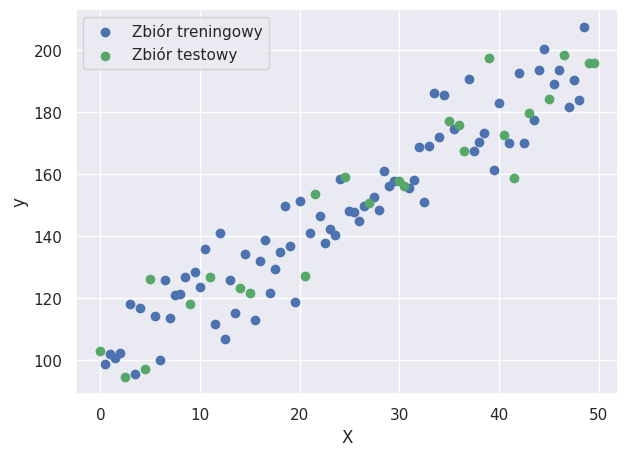

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show() #znika opis nad wykresem

### <a name='a5'></a> Regresja Liniowa

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #tworzę instancję klasy
lin_reg.fit(X_train, y_train) #trenujemy nasze dane treningowe

print(lin_reg.coef_) #wartości moich wag
print(lin_reg.intercept_) #oraz wartość w0 czyli miejsce przecięcia z osią y

[1.92941781]
101.1604233958918


Rozwiązaniem jest prosta w postaci

$Y = 101.86 + 1.93 ⋅ X_1$


### <a name='a6'></a> Wizualizacja zbioru treningowego i dopasowanego modelu

Jest to metoda najmniejszych kwadratów ona stara się redukować odległość tych błędów i dopasowuje linię trendu na podstawie funkcji kosztu. Czyli jest to najlepsze dopasowanie jakie model mógł znaleźć do tych danych

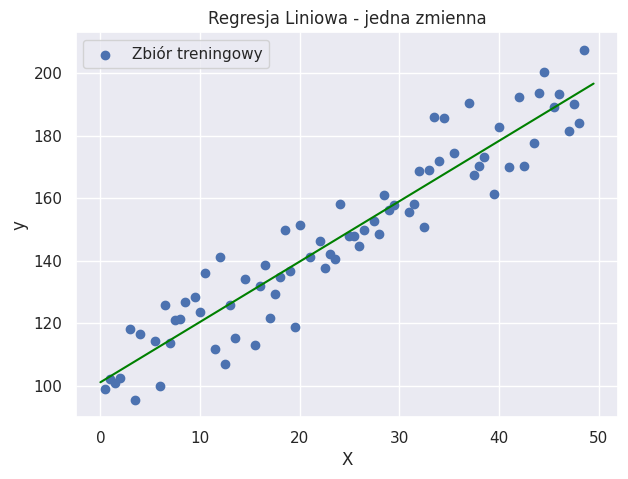

In [21]:
plt.figure(figsize=(7,5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='green') #w tym miejscu zapisana jest prosta  Y = XW z równania powyżej
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

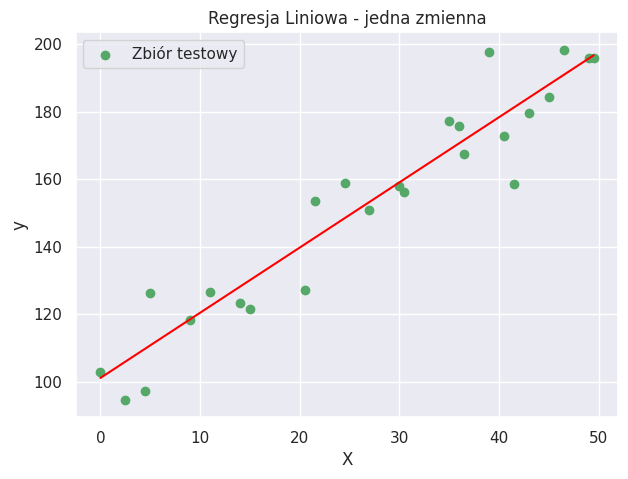

In [22]:
y_pred = lin_reg.predict(X_test) #tutaj na podstawie wyliczeń ze zbioru treningowego wyświetlę dopasowanie do zbioru testowego
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## <a name='a8'></a> Ocena modelu
Metoda `score()` zwraca współczynnik determinacji $R^2$  naszej predykcji.

Współczynnik determinacji jest zdefiniowany jako:

### $R^{2} =1 - \frac{\sum_{t=1}^{n}(y_{pred, t} - \bar{y}_{true} )^2}{\sum_{t=1}^{n}(y_{true, t} - \bar{y}_{true} )^2}$

Współczynnik determinacji jest miarą stopnia dopasowania modelu do próby. Dopasowanie modelu jest tym lepsze im wartość $R^2$ jest bliżej 1.

In [23]:
lin_reg.score(X_test, y_test)

0.9096747932217857

In [24]:
lin_reg.score?

### <a name='a9'></a> Przykład złego zastosowania regresji liniowej

In [28]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
y

array([ 63.73753318,  33.53509344,  38.42724402,  27.90769575,
        10.16550848,   6.48572014,   9.38896175,  12.27728186,
        10.12872904,   4.36286751, -11.05065545,   0.28499691,
         3.78453216,  10.44239282,  15.81466102,  11.33492754,
        23.03541839,  28.32137175,  40.86641737,  51.82862341])

[-0.23076158]
18.652168999039453


Text(0, 0.5, 'y')

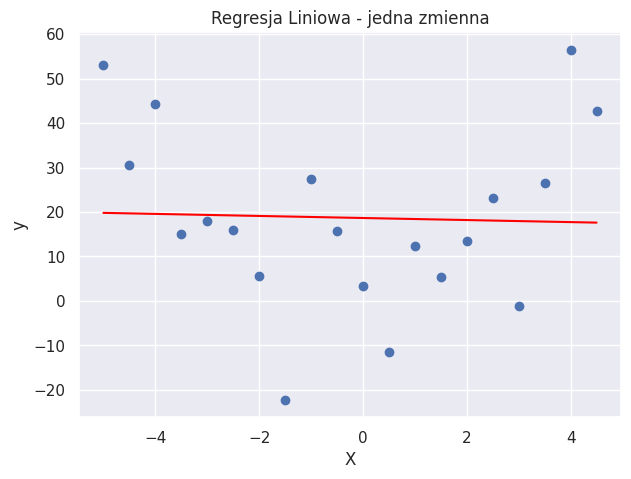

In [25]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')